In [109]:
#Gradient Boosting

import numpy as np
import matplotlib.pyplot as plt
from preamble import *
import pandas as pd
import mglearn
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import datasets
from sklearn.ensemble import GradientBoostingClassifier
import sklearn
from matplotlib import font_manager, rc
%matplotlib inline
font_name = font_manager.FontProperties(fname='c:/Windows/Fonts/malgun.ttf').get_name()
rc('font', family=font_name)



In [110]:
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import MinMaxScaler
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=1)

print(X_train.shape)
print(X_train)
print(X_test.shape)

scaler = MinMaxScaler()
scaler.fit(X_train)
# 데이터 변환
X_train_scaled = scaler.transform(X_train)

print(X_train_scaled)
print("변환된 후 크기:\n {}".format(X_train_scaled.shape))
print("스케일 조정 전 특성별 최솟값:\n {}".format(X_train.min(axis=0)))
print("스케일 조정 전 특성별 최댓값:\n {}".format(X_train.max(axis=0)))
print("스케일 조정 후 특성별 최솟값:\n {}".format(X_train_scaled.min(axis=0)))
print("스케일 조정 후 특성별 최댓값:\n {}".format(X_train_scaled.max(axis=0)))

(426, 30)
[[ 15.22   30.62  103.4   ...   0.236   0.409   0.141]
 [ 14.96   19.1    97.03  ...   0.149   0.296   0.085]
 [ 14.68   20.13   94.74  ...   0.161   0.303   0.082]
 ...
 [ 17.2    24.52  114.2   ...   0.19    0.331   0.134]
 [ 14.03   21.25   89.79  ...   0.08    0.223   0.076]
 [ 13.03   18.42   82.61  ...   0.05    0.199   0.062]]
(143, 30)
[[0.39  0.707 0.412 ... 0.81  0.6   0.918]
 [0.378 0.318 0.368 ... 0.512 0.332 0.316]
 [0.364 0.352 0.352 ... 0.553 0.348 0.289]
 ...
 [0.484 0.501 0.487 ... 0.653 0.415 0.843]
 [0.334 0.39  0.318 ... 0.274 0.157 0.224]
 [0.286 0.295 0.268 ... 0.172 0.1   0.069]]
변환된 후 크기:
 (426, 30)
스케일 조정 전 특성별 최솟값:
 [  6.981   9.71   43.79  143.5     0.053   0.019   0.      0.      0.106
   0.05    0.115   0.36    0.757   6.802   0.002   0.002   0.      0.
   0.01    0.001   7.93   12.02   50.41  185.2     0.071   0.027   0.
   0.      0.157   0.055]
스케일 조정 전 특성별 최댓값:
 [  28.11    39.28   188.5   2501.       0.163    0.287    0.427    0.201
    0.304

In [111]:
X_test_scaled = scaler.transform(X_test)

print("스케일 조정 후 특성별 최솟값:\n {}".format(X_test_scaled.min(axis=0)))
print("스케일 조정 후 특성별 최댓값:\n {}".format(X_test_scaled.max(axis=0)))

#0과 1 사이를 벗어나버렸다

스케일 조정 후 특성별 최솟값:
 [ 0.034  0.023  0.031  0.011  0.141  0.044  0.     0.     0.154 -0.006
 -0.001  0.006  0.004  0.001  0.039  0.011  0.     0.    -0.032  0.007
  0.027  0.058  0.02   0.009  0.109  0.026  0.     0.    -0.    -0.002]
스케일 조정 후 특성별 최댓값:
 [0.958 0.815 0.956 0.894 0.811 1.22  0.88  0.933 0.932 1.037 0.427 0.498
 0.441 0.284 0.487 0.739 0.767 0.629 1.337 0.391 0.896 0.793 0.849 0.745
 0.915 1.132 1.07  0.924 1.205 1.631]


In [112]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(cancer.data)
X_scaled = scaler.transform(cancer.data)

from sklearn.decomposition import PCA
# 데이터 의 처음 두 개 주성분만 유지시킵니다.
pca = PCA(n_components=2)
# cancer 데이터로 PCA모델을 구축
pca.fit(X_scaled)
# 처음 두 개의 주성분을 사용해 데이터 변환
X_pca = pca.transform(X_scaled)
print("원본 데이터 형태: {}".format(str(X_scaled.shape)))
print("축소된 데이터 형태: {}".format(str(X_pca.shape)))



원본 데이터 형태: (569, 30)
축소된 데이터 형태: (569, 2)


In [113]:
from sklearn.datasets import fetch_lfw_people
people =fetch_lfw_people(min_faces_per_person=20, resize=0.7)
image_shape = people.images[0].shape

In [114]:
print("people.images.shape: {}".format(people.images.shape))
print("클래스 개수: {}".format(len(people.target_names)))

people.images.shape: (3023, 87, 65)
클래스 개수: 62


In [115]:
mask = np.zeros(people.target.shape, dtype=np.bool)
for target in np.unique(people.target):
    mask[np.where(people.target == target)[0][:50]] =1

X_people = people.data[mask]
y_people = people.target[mask]

#0~255 사이의 흑백 이미지의 픽셀 값을 0~1 스케일로 조정합니다.
# MinMaxScaler를 적용하는 것과 거의 같습니다.
X_people = X_people /255

In [116]:
from sklearn.neighbors import KNeighborsClassifier

X_train, X_test, y_train, y_test = train_test_split(X_people, y_people, random_state=0)

knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)
print("1-최근접 이웃의 테스트 세트 점수: {:.2f}".format(knn.score(X_test, y_test)))

1-최근접 이웃의 테스트 세트 점수: 0.28


In [117]:
pca = PCA(n_components=100, whiten=True, random_state=0).fit(X_train)
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)
print("X_train_pca.shape: {}".format(X_train_pca.shape))
print("X_test_pca.shape: {}".format(X_test_pca.shape))
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train_pca, y_train)
print("테스트 세트 정확도: {:.2f}".format(knn.score(X_test_pca, y_test)))

X_train_pca.shape: (1547, 100)
X_test_pca.shape: (516, 100)
테스트 세트 정확도: 0.33


In [118]:
pca = PCA(n_components=100, whiten=False, random_state=0).fit(X_train)
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)
print("X_train_pca.shape: {}".format(X_train_pca.shape))
print("X_test_pca.shape: {}".format(X_test_pca.shape))
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train_pca, y_train)
print("테스트 세트 정확도: {:.2f}".format(knn.score(X_test_pca, y_test)))

X_train_pca.shape: (1547, 100)
X_test_pca.shape: (516, 100)
테스트 세트 정확도: 0.28


In [119]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
#2차원 데이터를 생성
X,y = make_blobs(random_state=1)
# 군집 모델을 만듭니다.
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)
print(kmeans.labels_)

#print(X)
print(kmeans.predict(X))

[0 2 2 2 1 1 1 2 0 0 2 2 1 0 1 1 1 0 2 2 1 2 1 0 2 1 1 0 0 1 0 0 1 0 2 1 2
 2 2 1 1 2 0 2 2 1 0 0 0 0 2 1 1 1 0 1 2 2 0 0 2 1 1 2 2 1 0 1 0 2 2 2 1 0
 0 2 1 1 0 2 0 2 2 1 0 0 0 0 2 0 1 0 0 2 2 1 1 0 1 0]
[0 2 2 2 1 1 1 2 0 0 2 2 1 0 1 1 1 0 2 2 1 2 1 0 2 1 1 0 0 1 0 0 1 0 2 1 2
 2 2 1 1 2 0 2 2 1 0 0 0 0 2 1 1 1 0 1 2 2 0 0 2 1 1 2 2 1 0 1 0 2 2 2 1 0
 0 2 1 1 0 2 0 2 2 1 0 0 0 0 2 0 1 0 0 2 2 1 1 0 1 0]


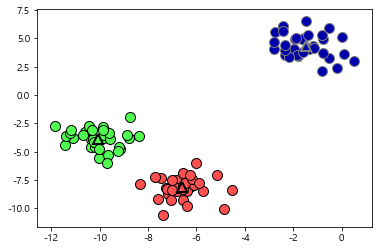

In [120]:
mglearn.discrete_scatter(X[:, 0], X[:, 1], kmeans.labels_, markers='o')
mglearn.discrete_scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1]
                         , [0,1,2], markers='^', markeredgewidth=2)


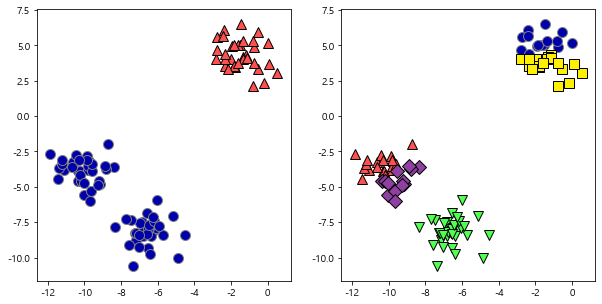

In [121]:
fig, axes = plt.subplots(1,2, figsize=(10,5))
kmeans = KMeans(n_clusters=2)
kmeans.fit(X)
assignments = kmeans.labels_

mglearn.discrete_scatter(X[:, 0], X[:, 1], assignments, ax=axes[0])
kmeans = KMeans(n_clusters=5)
kmeans.fit(X)
assignments = kmeans.labels_
mglearn.discrete_scatter(X[:, 0], X[:, 1], assignments, ax=axes[1])

In [122]:
from sklearn.decomposition import NMF

#백터 양자화
X_train, X_test, y_train, y_test = train_test_split(X_people, y_people, random_state=0)
nmf = NMF(n_components=100, random_state=0)
nmf.fit(X_train)
pca = PCA(n_components=100, random_state=0)
pca.fit(X_train)
kmeans = KMeans(n_clusters=100, random_state=0)
kmeans.fit(X_train)

x_reconstructed_pca = pca.inverse_transform(pca.transform(X_test))
x_reconstructed_kmeans = kmeans.cluster_centers_[kmeans.predict(X_test)]
x_reconstructed_nmf = np.dot(nmf.transform(X_test), nmf.components_)

Text(0, 0.5, 'nmf')

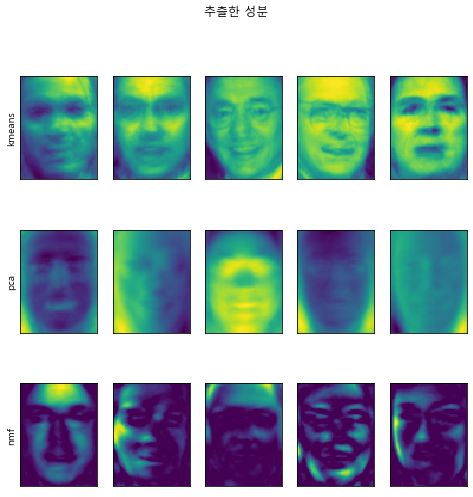

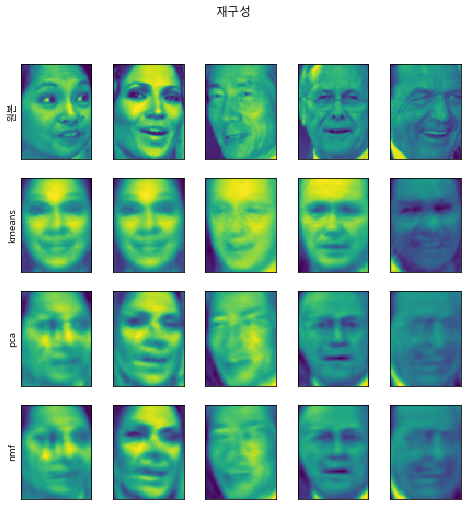

In [123]:
fig, axes = plt.subplots(3, 5, figsize=(8,8), subplot_kw={'xticks': (), 'yticks': ()})

fig.suptitle("추츨한 성분")
for ax, comp_kmeans, comp_pca, comp_nmf in zip(axes.T, kmeans.cluster_centers_,pca.components_, nmf.components_):
    ax[0].imshow(comp_kmeans.reshape(image_shape))
    ax[1].imshow(comp_pca.reshape(image_shape), cmap='viridis')
    ax[2].imshow(comp_nmf.reshape(image_shape))
    
axes[0,0].set_ylabel("kmeans")
axes[1,0].set_ylabel("pca")
axes[2,0].set_ylabel("nmf")

fig, axes = plt.subplots(4,5 ,subplot_kw={'xticks': (), 'yticks': ()},figsize=(8,8))
fig.suptitle("재구성")

for ax, orig, rec_kmeans, rec_pca, rec_nmf in zip(axes.T, X_test,
                        x_reconstructed_kmeans,x_reconstructed_pca,x_reconstructed_nmf):
    ax[0].imshow(orig.reshape(image_shape))
    ax[1].imshow(rec_kmeans.reshape(image_shape), cmap='viridis')
    ax[2].imshow(rec_pca.reshape(image_shape))
    ax[3].imshow(rec_nmf.reshape(image_shape))

axes[0, 0].set_ylabel("원본")
axes[1, 0].set_ylabel("kmeans")
axes[2, 0].set_ylabel("pca")
axes[3, 0].set_ylabel("nmf")

In [124]:
from sklearn.cluster import AgglomerativeClustering




agg = AgglomerativeClustering(n_clusters=3)

assignment = agg.fit_predict(X)



{'icoord': [[5.0, 5.0, 15.0, 15.0],
  [25.0, 25.0, 35.0, 35.0],
  [45.0, 45.0, 55.0, 55.0],
  [30.0, 30.0, 50.0, 50.0],
  [10.0, 10.0, 40.0, 40.0],
  [65.0, 65.0, 75.0, 75.0],
  [105.0, 105.0, 115.0, 115.0],
  [95.0, 95.0, 110.0, 110.0],
  [85.0, 85.0, 102.5, 102.5],
  [70.0, 70.0, 93.75, 93.75],
  [135.0, 135.0, 145.0, 145.0],
  [125.0, 125.0, 140.0, 140.0],
  [155.0, 155.0, 165.0, 165.0],
  [132.5, 132.5, 160.0, 160.0],
  [81.875, 81.875, 146.25, 146.25],
  [195.0, 195.0, 205.0, 205.0],
  [185.0, 185.0, 200.0, 200.0],
  [175.0, 175.0, 192.5, 192.5],
  [235.0, 235.0, 245.0, 245.0],
  [225.0, 225.0, 240.0, 240.0],
  [215.0, 215.0, 232.5, 232.5],
  [255.0, 255.0, 265.0, 265.0],
  [275.0, 275.0, 285.0, 285.0],
  [260.0, 260.0, 280.0, 280.0],
  [295.0, 295.0, 305.0, 305.0],
  [325.0, 325.0, 335.0, 335.0],
  [315.0, 315.0, 330.0, 330.0],
  [300.0, 300.0, 322.5, 322.5],
  [270.0, 270.0, 311.25, 311.25],
  [223.75, 223.75, 290.625, 290.625],
  [183.75, 183.75, 257.1875, 257.1875],
  [114.062

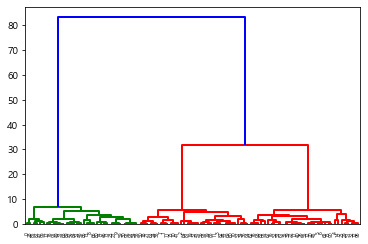

In [125]:
from scipy.cluster.hierarchy import dendrogram, ward

#배열 X를 입력받아 연결 배열 반환
linkage_array = ward(X)
dendrogram(linkage_array)

In [126]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN()
clusters = dbscan.fit_predict(X)
print(clusters)
# -1 은 노이즈 포인트
dbscan = DBSCAN(min_samples =2 , eps=1.0)
clusters = dbscan.fit_predict(X)
print(clusters)

dbscan = DBSCAN(min_samples =2 , eps=1.5)
clusters = dbscan.fit_predict(X)
print(clusters)

dbscan = DBSCAN(min_samples =2 , eps=3.0)
clusters = dbscan.fit_predict(X)
print(clusters)
#eps를 크게하면 하나의 클러스터가 되버린다.
dbscan = DBSCAN(min_samples =2 , eps=25.0)
clusters = dbscan.fit_predict(X)
print(clusters)



[-1 -1 -1  0 -1  1  1 -1 -1  2 -1  0  1 -1 -1  1  1  2  3 -1  1  3  1  2
  3 -1  1  2 -1 -1  4  5 -1  2 -1  1 -1 -1  3  1  1 -1  2 -1  0  1 -1 -1
 -1  2  3 -1 -1 -1  4  1 -1 -1  4  2  0 -1 -1 -1 -1 -1 -1 -1  2  0  0 -1
  1 -1 -1 -1  1  1  2 -1 -1 -1  0 -1  5 -1 -1 -1  0  5  1  2  4 -1 -1 -1
 -1  4 -1 -1]
[ 0  1  1  1 -1  2  2  1  0  0  1  1  2  0 -1  2  2  0  1  1  2  1  2  0
  1 -1  2  0  0  2  0  0  2  0  1  2  1  1  1  2  2  1  0  1  1  2  0  0
  0  0  1  2  2  2  0  2  1 -1  0  0  1  2  2  1  1  2  0  2  0  1  1  1
  2  0  0  1  2  2  0  1  0  1  1 -1  0  0 -1  0  1  0  2  0  0  1  1 -1
  2  0  2  0]
[ 0  1  1  1  2  2  2  1  0  0  1  1  2  0 -1  2  2  0  1  1  2  1  2  0
  1  2  2  0  0  2  0  0  2  0  1  2  1  1  1  2  2  1  0  1  1  2  0  0
  0  0  1  2  2  2  0  2  1  1  0  0  1  2  2  1  1  2  0  2  0  1  1  1
  2  0  0  1  2  2  0  1  0  1  1  2  0  0  0  0  1  0  2  0  0  1  1  2
  2  0  2  0]
[0 1 1 1 1 1 1 1 0 0 1 1 1 0 1 1 1 0 1 1 1 1 1 0 1 1 1 0 0 1 0 0 1 0 1 1 1
 1 1 1 

In [139]:
from sklearn.datasets import make_moons
X, y = make_moons(n_samples=200, noise=0.05, random_state=0)

scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)
dbscan = DBSCAN()
clusters = dbscan.fit_predict(X_scaled)

print(clusters)
# Eps를 작게/ 더 많은 클러스터 생성
dbscan = DBSCAN(eps=0.2)
clusters = dbscan.fit_predict(X_scaled)
print(clusters)
# Eps를 크게/ 하나의 클러스터 생성
dbscan = DBSCAN(eps=0.7)
clusters = dbscan.fit_predict(X_scaled)
print(clusters)

[0 1 1 0 1 1 0 1 0 1 0 1 1 1 0 0 0 1 0 0 1 1 0 1 0 1 1 1 1 0 0 0 1 1 0 1 1
 0 0 1 1 0 0 1 1 0 0 0 1 1 0 1 1 0 1 0 0 1 0 0 1 0 1 0 1 0 0 1 0 0 1 0 1 1
 1 0 1 0 0 1 1 0 1 1 1 0 0 0 1 1 0 0 1 0 1 1 1 1 0 1 1 1 0 0 0 1 0 0 1 0 0
 0 0 0 0 1 0 1 1 0 0 0 1 0 1 0 0 1 1 1 0 0 0 1 1 1 1 0 1 0 1 1 0 0 0 0 1 1
 0 1 1 1 0 0 1 0 1 1 0 0 1 1 0 1 1 1 0 1 1 1 0 0 0 0 1 1 1 0 0 0 1 0 1 1 1
 0 0 1 0 0 0 0 0 0 1 0 1 1 0 1]
[ 0  1  2 -1  3  3  0  1  0  1  6  4  3  1  5  0  6  4  6  6  3  1  6  1
  6  4  3  3  4  6  0 -1  1  2  6  3  4  0  5  2  1  6  6  4  1  6  0  5
  4  1  6  4  3 -1  1  6  6  1  6  6  4  5  3  0  1  5  6  1  6  5  1  5
  1 -1  1  5  2  0  6  1  3  6  1  3  2  6  0  6  1  3  6  0  3  6  3  3
  3  4  5  4 -1  3  6  0  5  2  5  6  1  6  6  6  6  5  0  1  6  3  1  0
  0  5  2  6  2  5  0  4  1  3  0  6  5  4  1  3  1  5  3  0  4  2  6  6
  6  0  4  1  6  2  1  1  0  6  1  6  1  4  6  6  4  1  6  1  1  3  6  1
  1  1  6 -1  5  5  4  1  3  5  5  6  1  5  3  1  3  6  6  1  5  6  5  6
  0  0  2

In [152]:
#군집 평가
from sklearn.metrics.cluster import adjusted_rand_score
#200개 샘플 생성
X,y = make_moons(n_samples=200, noise=0.05, random_state=0)

scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)

#모델 리스트 생성
algorithms = [KMeans(n_clusters=2), AgglomerativeClustering(n_clusters=2), DBSCAN()]
clusters =[algorithms[0].fit(X_scaled).predict(X_scaled), algorithms[1].fit_predict(X_scaled),
           algorithms[2].fit_predict(X_scaled)]
print(adjusted_rand_score(y, clusters[0]))
print(adjusted_rand_score(y, clusters[1]))
print(adjusted_rand_score(y, clusters[2]))
#DBSCAN이 결과가 제일 좋다


0.5015957062647948
0.6065184066117171
1.0


In [155]:
from sklearn.metrics.cluster import silhouette_score

print(silhouette_score(X_scaled, clusters[0]))

print(silhouette_score(X_scaled, clusters[1]))

print(silhouette_score(X_scaled, clusters[2]))

#밀집도로 평가하기 때문에, Kmeans가 제일 높게 나온다.

0.49304627727701233
0.4572323945292666
0.382386022679393


In [164]:
# 주성분을 ㅗ의미 있는 특징 추출 및 차원 축소로 계산 속도 증가
from sklearn.decomposition import PCA

#Fit the model with X and apply the dimensionality reduction on X
pca = PCA(n_components=100, whiten=True, random_state=0)
# 기본 매개변수로 DBSCAN 적용
X_pca = pca.fit_transform(X_people)
dbscan = DBSCAN()
labels = dbscan.fit_predict(X_pca)
#고유한 레이블: [-1] #모두 잡음 포인트
print("고유한 레이블: {}".format(np.unique(labels)))
dbscan = DBSCAN(min_samples=3) #고유한 레이블:[-1]
labels = dbscan.fit_predict(X_pca)
print("고유한 레이블: {}".format(np.unique(labels)))
dbscan = DBSCAN(min_samples=3, eps=15) #고유한 레이블:[-1]
labels = dbscan.fit_predict(X_pca)
print("고유한 레이블: {}".format(np.unique(labels)))
print(labels)

고유한 레이블: [-1]
고유한 레이블: [-1]
고유한 레이블: [-1  0]
[0 0 0 ... 0 0 0]


k-평균의 클러스터 크기: [282 226 105 268 151 324 202 208 208  89]


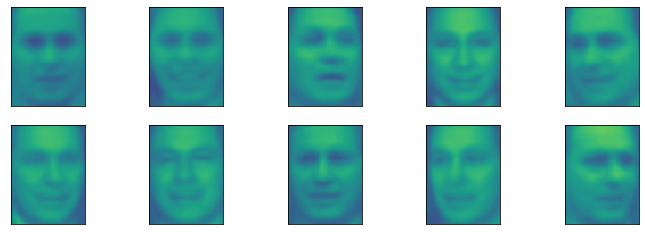

In [167]:
n_clusters =10
# k-평균으로 클러스터를 추출
km = KMeans(n_clusters=n_clusters, random_state=0)

labels_km = km.fit_predict(X_pca)

print("k-평균의 클러스터 크기: {}".format(np.bincount(labels_km)))

fig, axes = plt.subplots(2,5, subplot_kw={'xticks': (),'yticks': ()}, figsize=(12,4))
for center, ax in zip(km.cluster_centers_, axes.ravel()):
    ax.imshow(pca.inverse_transform(center).reshape(image_shape), vmin=0,vmax=1)


k-평균의 클러스터 크기: [ 28  99  52  26  22  75  37 109  38 101  11  39  26  40   2   9  81  28
  53  60  20  39  63  67  91   3  76  50 118  67   1   2  62   1   5   1
   1  47  49  65  61 127  37   1  73]


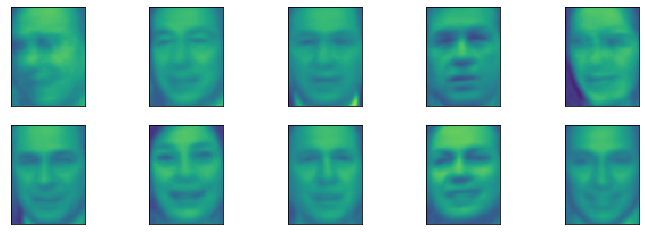

In [168]:
n_clusters =45
# k-평균으로 클러스터를 추출
km = KMeans(n_clusters=n_clusters, random_state=0)

labels_km = km.fit_predict(X_pca)

#bincount는 빈도수의 갯수를 체크해서 numpyarray를 만들어준다
print("k-평균의 클러스터 크기: {}".format(np.bincount(labels_km)))

fig, axes = plt.subplots(2,5, subplot_kw={'xticks': (),'yticks': ()}, figsize=(12,4))
for center, ax in zip(km.cluster_centers_, axes.ravel()):
    ax.imshow(pca.inverse_transform(center).reshape(image_shape), vmin=0,vmax=1)


{'icoord': [[15.0, 15.0, 25.0, 25.0],
  [5.0, 5.0, 20.0, 20.0],
  [35.0, 35.0, 45.0, 45.0],
  [55.0, 55.0, 65.0, 65.0],
  [40.0, 40.0, 60.0, 60.0],
  [12.5, 12.5, 50.0, 50.0],
  [95.0, 95.0, 105.0, 105.0],
  [85.0, 85.0, 100.0, 100.0],
  [75.0, 75.0, 92.5, 92.5],
  [31.25, 31.25, 83.75, 83.75],
  [115.0, 115.0, 125.0, 125.0],
  [135.0, 135.0, 145.0, 145.0],
  [120.0, 120.0, 140.0, 140.0],
  [155.0, 155.0, 165.0, 165.0],
  [175.0, 175.0, 185.0, 185.0],
  [160.0, 160.0, 180.0, 180.0],
  [130.0, 130.0, 170.0, 170.0],
  [195.0, 195.0, 205.0, 205.0],
  [215.0, 215.0, 225.0, 225.0],
  [200.0, 200.0, 220.0, 220.0],
  [235.0, 235.0, 245.0, 245.0],
  [255.0, 255.0, 265.0, 265.0],
  [240.0, 240.0, 260.0, 260.0],
  [210.0, 210.0, 250.0, 250.0],
  [150.0, 150.0, 230.0, 230.0],
  [57.5, 57.5, 190.0, 190.0],
  [275.0, 275.0, 285.0, 285.0],
  [295.0, 295.0, 305.0, 305.0],
  [280.0, 280.0, 300.0, 300.0],
  [315.0, 315.0, 325.0, 325.0],
  [335.0, 335.0, 345.0, 345.0],
  [320.0, 320.0, 340.0, 340.0],
  

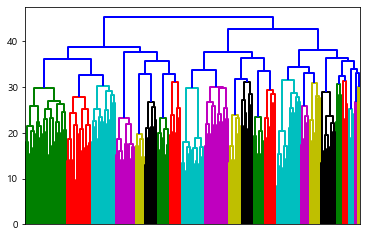

In [177]:
#깊이 제한 (p=7)
linkage_array = ward(X_pca)

dendrogram(linkage_array, p=7, truncate_mode='level', no_labels=True)

In [176]:
agglomerative = AgglomerativeClustering(n_clusters=10)
labels_agg = agglomerative.fit_predict(X_pca)
print(labels_agg)
print("병합군집의 클러스터 크기: {}".format(np.bincount(labels_agg)))

[9 7 1 ... 0 0 2]
병합군집의 클러스터 크기: [169 660 144 329 217  85  18 261  31 149]


In [178]:
agglomerative = AgglomerativeClustering(n_clusters=40)
labels_agg = agglomerative.fit_predict(X_pca)
print(labels_agg)
print("병합군집의 클러스터 크기: {}".format(np.bincount(labels_agg)))

[ 6  1  2 ... 10 38 32]
병합군집의 클러스터 크기: [ 43 120 100 194  56  58 127  22   6  37  65  49  84  18 168  44  47  31
  78  30 166  20  57  14  11  29  23   5   8  84  67  30  57  16  22  12
  29   2  26   8]
